In [1]:
import os
import cv2
import numpy as np
import pandas as pd
from PIL import Image
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.image as mpimg
import tensorflow as tf
from tensorflow import keras
from PIL import Image
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout ,BatchNormalization

from tensorflow.keras.optimizers import Adamax
import seaborn as sns
import matplotlib.pyplot as plt
from tensorflow.keras.utils import plot_model

In [2]:
from google.colab import drive
drive.mount("/content/drive", force_remount=True)

Mounted at /content/drive


In [3]:
!unzip '/content/drive/MyDrive/catsvsdogs/catsdogs.zip'

Streaming output truncated to the last 5000 lines.
  inflating: training_set/training_set/cats/cat.3704.jpg  
  inflating: training_set/training_set/cats/cat.3705.jpg  
  inflating: training_set/training_set/cats/cat.3706.jpg  
  inflating: training_set/training_set/cats/cat.3707.jpg  
  inflating: training_set/training_set/cats/cat.3708.jpg  
  inflating: training_set/training_set/cats/cat.3709.jpg  
  inflating: training_set/training_set/cats/cat.371.jpg  
  inflating: training_set/training_set/cats/cat.3710.jpg  
  inflating: training_set/training_set/cats/cat.3711.jpg  
  inflating: training_set/training_set/cats/cat.3712.jpg  
  inflating: training_set/training_set/cats/cat.3713.jpg  
  inflating: training_set/training_set/cats/cat.3714.jpg  
  inflating: training_set/training_set/cats/cat.3715.jpg  
  inflating: training_set/training_set/cats/cat.3716.jpg  
  inflating: training_set/training_set/cats/cat.3717.jpg  
  inflating: training_set/training_set/cats/cat.3718.jpg  
  infl

In [5]:
cats1 = os.listdir('/content/training_set/training_set/cats')
cats2 = os.listdir('/content/test_set/test_set/cats')
dogs1 = os.listdir('/content/training_set/training_set/dogs')
dogs2 = os.listdir('/content/test_set/test_set/dogs')

In [29]:
print(len(cats1))
print(len(cats2))
print(len(dogs1))
print(len(dogs2))

4000
1011
4005
1012


In [30]:
cat_labels = [1]*5011
dog_labels = [0]*5017
dataset_labels = cat_labels+dog_labels

In [31]:
def image_show(s):
   img = mpimg.imread(s)
   plt.imshow(img)
   plt.show()

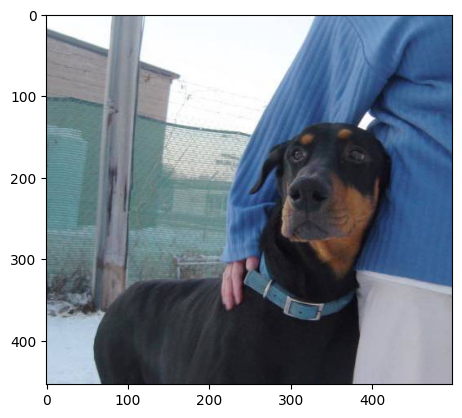

In [33]:
image_show(f'/content/test_set/test_set/dogs/{dogs2[1]}')

In [36]:
X_train = []
X_test = []


for img_file in cats2:
  image = Image.open('/content/test_set/test_set/cats/' + img_file)
  image = image.resize((128,128))
  image = image.convert('RGB')
  image = np.array(image)
  X_test.append(image)

for img_file in dogs2:
  image = Image.open('/content/test_set/test_set/dogs/' + img_file)
  image = image.resize((128,128))
  image = image.convert('RGB')
  image = np.array(image)
  X_test.append(image)


for img_file in cats1:
  image = Image.open('/content/training_set/training_set/cats/' + img_file)
  image = image.resize((128,128))
  image = image.convert('RGB')
  image = np.array(image)
  X_train.append(image)

for img_file in dogs1:
  image = Image.open('/content/training_set/training_set/dogs/' + img_file)
  image = image.resize((128,128))
  image = image.convert('RGB')
  image = np.array(image)
  X_train.append(image)

In [45]:
X_train = np.array(X_train)
X_test = np.array(X_test)

print(X_train.shape)
print(X_test.shape)

(8005, 128, 128, 3)
(2023, 128, 128, 3)


In [46]:
Y_train = np.array([1]*4000 + [0]*4005)
Y_test = np.array([1]*1011 + [0]*1012)

In [47]:
model = keras.Sequential()

model.add(keras.layers.Conv2D(32, kernel_size=(3,3), activation='relu', input_shape=(128,128,3)))
model.add(keras.layers.MaxPooling2D(pool_size=(2,2)))


model.add(keras.layers.Conv2D(64, kernel_size=(3,3), activation='relu'))
model.add(keras.layers.MaxPooling2D(pool_size=(2,2)))

model.add(keras.layers.Flatten())

model.add(keras.layers.Dense(128, activation='relu'))
model.add(keras.layers.Dropout(0.5))

model.add(BatchNormalization())

model.add(keras.layers.Dense(64, activation='relu'))
model.add(keras.layers.Dropout(0.5))


model.add(keras.layers.Dense(2, activation='sigmoid'))

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 126, 126, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 63, 63, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 61, 61, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 30, 30, 64)        0         
 g2D)                                                            
                                                                 
 flatten (Flatten)           (None, 57600)             0         
                                                                 
 dense (Dense)               (None, 128)               7

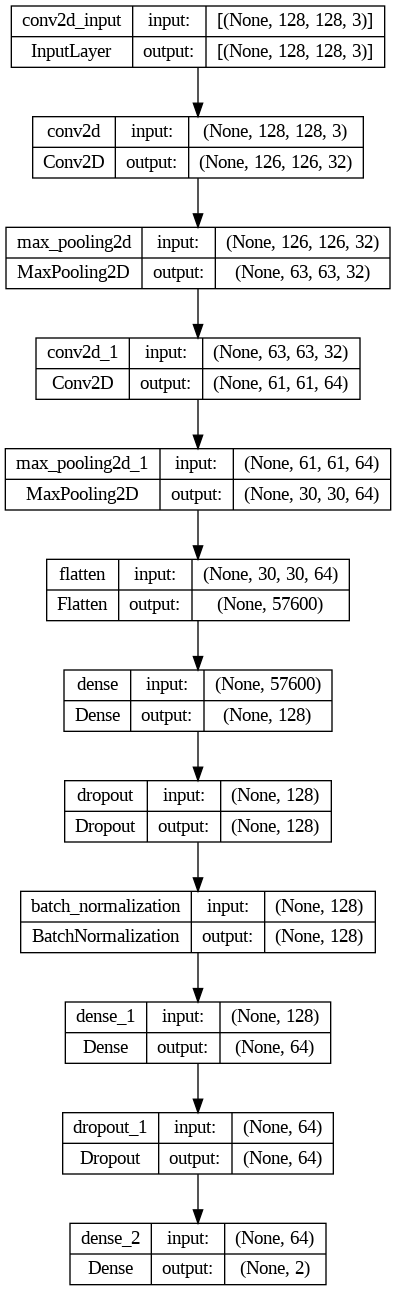

In [48]:
plot_model(model, show_shapes=True, show_layer_names=True) # to_file='model_plot.png'

In [57]:
optimizer = Adamax(learning_rate=0.001)
model.compile(optimizer=optimizer, loss='sparse_categorical_crossentropy', metrics=['accuracy'])

history = model.fit(X_train, Y_train, validation_split=0.3, epochs=30)

Epoch 1/30
176/176 [==============================] - 5s 20ms/step - loss: 0.3307 - accuracy: 0.8367 - val_loss: 1.3799 - val_accuracy: 0.5183
Epoch 2/30
176/176 [==============================] - 3s 19ms/step - loss: 0.2582 - accuracy: 0.8810 - val_loss: 1.3963 - val_accuracy: 0.5366
Epoch 3/30
176/176 [==============================] - 3s 18ms/step - loss: 0.2385 - accuracy: 0.8897 - val_loss: 1.1110 - val_accuracy: 0.6087
Epoch 4/30
176/176 [==============================] - 5s 26ms/step - loss: 0.2245 - accuracy: 0.8974 - val_loss: 1.8694 - val_accuracy: 0.4775
Epoch 5/30
176/176 [==============================] - 4s 25ms/step - loss: 0.1974 - accuracy: 0.9120 - val_loss: 1.3349 - val_accuracy: 0.5325
Epoch 6/30
176/176 [==============================] - 5s 28ms/step - loss: 0.1884 - accuracy: 0.9147 - val_loss: 1.8406 - val_accuracy: 0.4663
Epoch 7/30
176/176 [==============================] - 4s 20ms/step - loss: 0.1918 - accuracy: 0.9131 - val_loss: 2.3187 - val_accuracy: 0.4230

In [58]:
loss, accuracy = model.evaluate(X_test, Y_test)

64/64 [==============================] - 0s 6ms/step - loss: 1.9530 - accuracy: 0.6757


dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


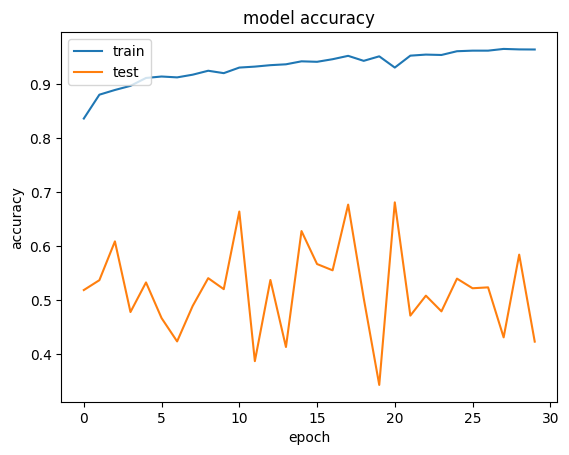

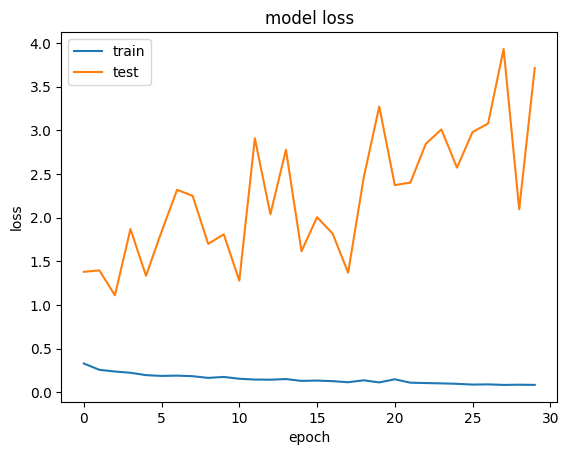

In [59]:
print(history.history.keys())
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [60]:
from sklearn.metrics import classification_report

y_pred = model.predict(X_test)
y_pred = np.argmax(y_pred, axis=1)

print(classification_report(Y_test, y_pred))

64/64 [==============================] - 0s 6ms/step
              precision    recall  f1-score   support

           0       0.86      0.42      0.57      1012
           1       0.62      0.93      0.74      1011

    accuracy                           0.68      2023
   macro avg       0.74      0.68      0.65      2023
weighted avg       0.74      0.68      0.65      2023



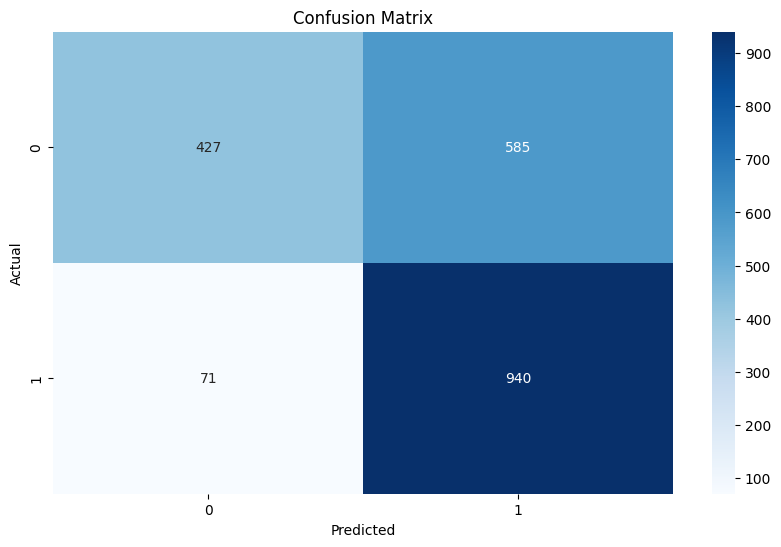

In [61]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(Y_test, y_pred)
#plot confusion matrix
plt.figure(figsize=(10, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

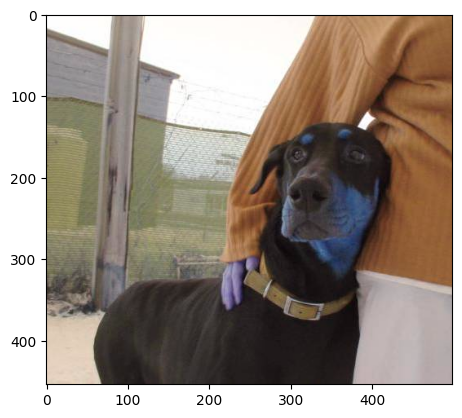

1/1 [==============================] - 0s 28ms/step
[[0.3579071 0.5842461]]
0
It is a dog


In [64]:
input_image_path = f'/content/test_set/test_set/dogs/{dogs2[1]}'
input_image = cv2.imread(input_image_path)

plt.imshow(input_image)
plt.show()

input_image_resized = cv2.resize(input_image, (128,128))
input_image_scaled = input_image_resized/255
input_image_reshaped = np.reshape(input_image_scaled, [1,128,128,3])
input_prediction = model.predict(input_image_reshaped)
print(input_prediction)


input_pred_label = np.argmax(input_prediction)
print(input_pred_label)

if input_pred_label == 1:
  print('It is a cat')
else:
  print('It is a dog')

In [65]:
model2 = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(128,128,3)),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Conv2D(128, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Conv2D(128, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

model2.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the baseline model
history_baseline = model2.fit(X_train, Y_train, validation_split=0.3, epochs=30)

Epoch 1/30
176/176 [==============================] - 9s 25ms/step - loss: 1.5519 - accuracy: 0.7027 - val_loss: 1.2567 - val_accuracy: 0.0025
Epoch 2/30
176/176 [==============================] - 3s 19ms/step - loss: 0.5901 - accuracy: 0.7152 - val_loss: 1.8149 - val_accuracy: 0.0012
Epoch 3/30
176/176 [==============================] - 3s 19ms/step - loss: 0.5819 - accuracy: 0.7191 - val_loss: 1.1048 - val_accuracy: 0.1170
Epoch 4/30
176/176 [==============================] - 5s 31ms/step - loss: 0.5763 - accuracy: 0.7173 - val_loss: 1.2652 - val_accuracy: 0.0945
Epoch 5/30
176/176 [==============================] - 5s 26ms/step - loss: 0.5728 - accuracy: 0.7196 - val_loss: 1.1454 - val_accuracy: 0.0146
Epoch 6/30
176/176 [==============================] - 4s 25ms/step - loss: 0.5588 - accuracy: 0.7294 - val_loss: 1.1508 - val_accuracy: 0.2206
Epoch 7/30
176/176 [==============================] - 5s 30ms/step - loss: 0.5369 - accuracy: 0.7351 - val_loss: 1.3779 - val_accuracy: 0.0924